In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime as dt
import pandas_datareader.data as web

In [2]:
df_1=pd.read_csv("tesla.csv")
df_2=pd.read_csv("ntsl.csv")
df_1.drop("Vol.",1,inplace=True)
df_2.drop("Vol.",1,inplace=True)

In [3]:
print(df_1.head())
print(df_2.head())
df_1.set_index("Date",inplace=True)
df_2.set_index("Date",inplace=True)


           Date   Price    Open    High     Low  Change
0  Apr 11, 2019  268.42  268.00  270.38  265.83  -2.77%
1  Apr 10, 2019  276.06  276.70  278.00  272.89   1.38%
2  Apr 09, 2019  272.31  271.65  275.00  269.61  -0.33%
3  Apr 08, 2019  273.20  277.69  281.16  270.44  -0.64%
4  Apr 05, 2019  274.96  269.86  276.10  266.11   2.68%
           Date  Price   Open   High    Low  Change
0  Apr 11, 2019  70.97  69.00  73.00  68.65  -0.15%
1  Apr 10, 2019  71.08  74.70  74.99  71.08  -4.60%
2  Apr 09, 2019  74.51  75.90  75.90  72.30  -1.23%
3  Apr 08, 2019  75.44  78.52  79.00  75.44  -5.11%
4  Apr 05, 2019  79.50  79.00  79.99  78.60  -0.61%


In [4]:
print(df_1.dtypes.tolist())
print(df_2.dtypes.tolist())

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O')]
[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O')]


In [5]:
df_1["Change"]=df_1["Change"].str.replace("%"," ")
df_2["Change"]=df_2["Change"].str.replace("%"," ")
df_1["Change"]=df_1["Change"].astype(float,inplace=True)
df_2["Change"]=df_2["Change"].astype(float,inplace=True)
df_1.rename(columns={"Change": "Tesla_return"},inplace=True)
df_2.rename(columns={"Change": "netsol_return"},inplace=True)
print(df_1.head())

               Price    Open    High     Low  Tesla_return
Date                                                      
Apr 11, 2019  268.42  268.00  270.38  265.83         -2.77
Apr 10, 2019  276.06  276.70  278.00  272.89          1.38
Apr 09, 2019  272.31  271.65  275.00  269.61         -0.33
Apr 08, 2019  273.20  277.69  281.16  270.44         -0.64
Apr 05, 2019  274.96  269.86  276.10  266.11          2.68


In [6]:
df_1["Tesla_return"]=df_1["Tesla_return"]/100
df_2["netsol_return"]=df_2["netsol_return"]/100

In [7]:
print(df_1.head())
print(df_2.head())

               Price    Open    High     Low  Tesla_return
Date                                                      
Apr 11, 2019  268.42  268.00  270.38  265.83       -0.0277
Apr 10, 2019  276.06  276.70  278.00  272.89        0.0138
Apr 09, 2019  272.31  271.65  275.00  269.61       -0.0033
Apr 08, 2019  273.20  277.69  281.16  270.44       -0.0064
Apr 05, 2019  274.96  269.86  276.10  266.11        0.0268
              Price   Open   High    Low  netsol_return
Date                                                   
Apr 11, 2019  70.97  69.00  73.00  68.65        -0.0015
Apr 10, 2019  71.08  74.70  74.99  71.08        -0.0460
Apr 09, 2019  74.51  75.90  75.90  72.30        -0.0123
Apr 08, 2019  75.44  78.52  79.00  75.44        -0.0511
Apr 05, 2019  79.50  79.00  79.99  78.60        -0.0061


In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
ax=plt.subplot(111)

df_2["netsol_return"].plot()

ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

In [9]:
df_3=pd.read_csv("sandp500.csv")
df_3.rename(columns={"Change %": "SANDP500_return"},inplace=True)
df_3["SANDP500_return"]=df_3["SANDP500_return"].str.replace("%"," ")
df_3.drop("Vol.",1,inplace=True)
df_3.set_index("Date",inplace=True)

In [10]:
print(df_3.head())

                 Price      Open      High       Low SANDP500_return
Date                                                                
Apr 11, 2019  2,888.32  2,891.92  2,893.42  2,881.99           0.00 
Apr 10, 2019  2,888.21  2,881.37  2,889.71  2,879.13           0.35 
Apr 09, 2019  2,878.20  2,886.58  2,886.88  2,873.33          -0.61 
Apr 08, 2019  2,895.77  2,888.46  2,895.95  2,880.78           0.10 
Apr 05, 2019  2,892.74  2,884.16  2,893.24  2,882.99           0.46 


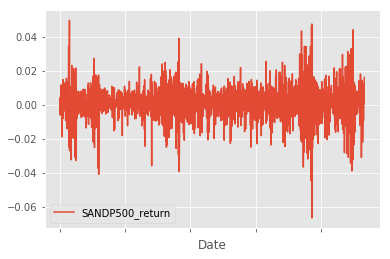

In [11]:
df_3["SANDP500_return"]=df_3["SANDP500_return"].astype(float,inplace=True)
df_3["SANDP500_return"]=df_3["SANDP500_return"]/100
df_3["SANDP500_return"].plot()

ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.legend()
plt.show()


                 Price      Open      High       Low  SANDP500_return  \
Date                                                                    
Apr 11, 2019  2,888.32  2,891.92  2,893.42  2,881.99           0.0000   
Apr 10, 2019  2,888.21  2,881.37  2,889.71  2,879.13           0.0035   
Apr 09, 2019  2,878.20  2,886.58  2,886.88  2,873.33          -0.0061   
Apr 08, 2019  2,895.77  2,888.46  2,895.95  2,880.78           0.0010   
Apr 05, 2019  2,892.74  2,884.16  2,893.24  2,882.99           0.0046   

              Tesla_return  netsol_return  
Date                                       
Apr 11, 2019       -0.0277        -0.0015  
Apr 10, 2019        0.0138        -0.0460  
Apr 09, 2019       -0.0033        -0.0123  
Apr 08, 2019       -0.0064        -0.0511  
Apr 05, 2019        0.0268        -0.0061  


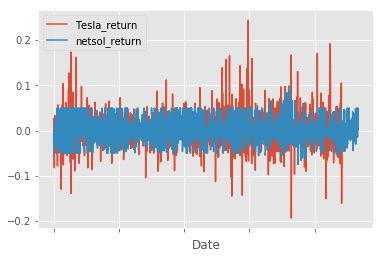

In [12]:
###final data for regression
df_3["Tesla_return"]=df_1["Tesla_return"]
df_3["netsol_return"]=df_2["netsol_return"]
df_3.fillna(method="backfill")##4.96%(pakistan-tbills),2.28%(US-tbills)
print(df_3.head())
df_3["SANDP500_return"]=df_3["SANDP500_return"].astype(float,inplace=True)
df_3["Tesla_return"].plot()
df_3["netsol_return"].plot()
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.legend()
plt.show()

The beta of tesla is: [1.26920997]


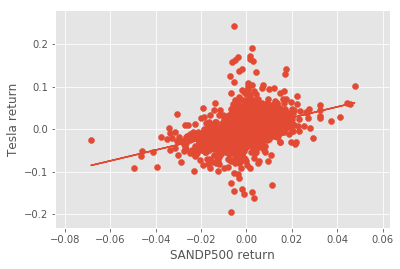

In [13]:
#beta for Tesla
df_3.dropna(inplace=True)
clf=LinearRegression()
X=np.array(df_3["SANDP500_return"]-((2.28/12)/100))
y=np.array(df_3["Tesla_return"]-((2.28/12)/100))
X=X.reshape(-1,1)
clf.fit(X,y)
beta_tesla=clf.coef_
ax=plt.subplot(111)
ax.scatter(X,y)
ax.set_xlabel("SANDP500 return")
ax.set_ylabel("Tesla return")
X=X.reshape(-1,1)
clf.fit(X,y)
a=clf.intercept_
b=clf.coef_
yfit = [a + b * xi for xi in X]
ax.plot(X,yfit)

print("The beta of tesla is:",beta_tesla)


In [14]:
df_4=pd.read_csv("kse100.csv")
df_4.rename(columns={"Change %": "KSE100_return"},inplace=True)
df_4["KSE100_return"]=df_4["KSE100_return"].str.replace("%"," ")
df_4.drop("Vol.",1,inplace=True)
df_4.set_index("Date",inplace=True)
print(df_4.head())

                  Price       Open       High        Low KSE100_return
Date                                                                  
Apr 11, 2019  36,787.64  36,555.20  36,910.03  36,499.34         0.57 
Apr 10, 2019  36,579.32  37,138.79  37,170.36  36,464.85        -1.48 
Apr 09, 2019  37,129.97  36,906.30  37,270.58  36,593.20         0.56 
Apr 08, 2019  36,921.91  37,552.90  37,552.90  36,738.96        -1.60 
Apr 05, 2019  37,521.81  37,517.13  37,592.27  37,307.14         0.02 


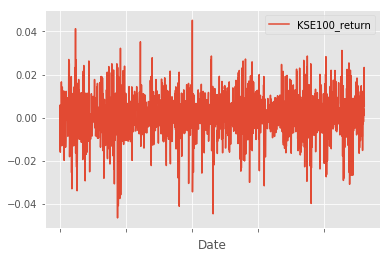

In [15]:

df_4["KSE100_return"]=df_4["KSE100_return"].astype(float,inplace=True)
df_4["KSE100_return"]=df_4["KSE100_return"]/100
df_4["KSE100_return"].plot()

ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.legend()
plt.show()


The beta of netsol is: [1.20217878]


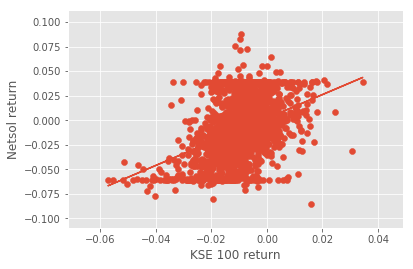

In [16]:
#beta for Netsol
import matplotlib.pyplot as plt
df_3["KSE100_return"]=df_4["KSE100_return"]
df_3.fillna(method="backfill")
clf=LinearRegression()
X=np.array(df_3["KSE100_return"]-((12.792/12)/100))
y=np.array(df_3["netsol_return"]-((12.792/12)/100))
ax=plt.subplot(111)
ax.scatter(X,y)
ax.set_xlabel("KSE 100 return")
ax.set_ylabel("Netsol return")
X=X.reshape(-1,1)
clf.fit(X,y)
a=clf.intercept_
b=clf.coef_
yfit = [a + b * xi for xi in X]
ax.plot(X,yfit)
beta_netsol=clf.coef_
print("The beta of netsol is:",beta_netsol)
plt.show()

In [17]:
print(df_3.head())
df_3.to_csv("Used_data")

                 Price      Open      High       Low  SANDP500_return  \
Date                                                                    
Apr 11, 2019  2,888.32  2,891.92  2,893.42  2,881.99           0.0000   
Apr 10, 2019  2,888.21  2,881.37  2,889.71  2,879.13           0.0035   
Apr 09, 2019  2,878.20  2,886.58  2,886.88  2,873.33          -0.0061   
Apr 08, 2019  2,895.77  2,888.46  2,895.95  2,880.78           0.0010   
Apr 05, 2019  2,892.74  2,884.16  2,893.24  2,882.99           0.0046   

              Tesla_return  netsol_return  KSE100_return  
Date                                                      
Apr 11, 2019       -0.0277        -0.0015         0.0057  
Apr 10, 2019        0.0138        -0.0460        -0.0148  
Apr 09, 2019       -0.0033        -0.0123         0.0056  
Apr 08, 2019       -0.0064        -0.0511        -0.0160  
Apr 05, 2019        0.0268        -0.0061         0.0002  


In [18]:
df_factors = pd.read_csv('factor.csv', parse_dates=['Date'])
df_factors.set_index("Date",inplace=True)
df_factors.dropna(inplace=True)
df_factors.to_excel("f.xlsx")
df_factors.dropna(inplace=True)


In [19]:
df_factors=df_factors[:2104]
kse=np.array(df_3["KSE100_return"][:2104])
df_factors["KSE100_return"]=kse
sandp500=np.array(df_3["SANDP500_return"][:2104])
df_factors["SANDP500_return"]=sandp500

In [20]:
print(df_factors.head())

             SMB   HML  KSE100_return  SANDP500_return
Date                                                  
2010-01-04  0.58  1.12         0.0057           0.0000
2010-01-05 -0.58  1.22        -0.0148           0.0035
2010-01-06 -0.25  0.52         0.0056          -0.0061
2010-01-07  0.08  0.94        -0.0160           0.0010
2010-01-08  0.40  0.01         0.0002           0.0046


In [21]:
df_3.fillna(method="backfill")
clf=LinearRegression()
X=np.array(df_factors[["KSE100_return","SMB","HML"]])
y=np.array(df_3["netsol_return"])
clf.fit(X,y)
beta_netsol=clf.coef_
print("The betas of netsol is:",beta_netsol)

The betas of netsol is: [ 1.20266982e+00 -4.98947818e-04 -2.32843913e-05]


In [22]:
df_3.fillna(method="backfill")
clf=LinearRegression()
X=np.array(df_factors[["SANDP500_return","SMB","HML"]])
y=np.array(df_3["Tesla_return"])
clf.fit(X,y)
beta_tesla=clf.coef_
print("The betas of tesla is:",beta_tesla)

The betas of tesla is: [ 1.26810660e+00  2.37949521e-04 -1.46030784e-03]


In [23]:
from statistics import mean,stdev
mean_tesla=mean(df_1["Tesla_return"])
std_tesla=stdev(df_1["Tesla_return"])
print("The mean and std respectively for tesla is:",mean_tesla,std_tesla)

The mean and std respectively for tesla is: 0.0016203435804701628 0.0325768316652694


In [24]:
from statistics import mean,stdev
mean_netsol=mean(df_2["netsol_return"])
std_netsol=stdev(df_2["netsol_return"])
print("The mean and std respectively for netsol is:",mean_netsol,std_netsol)

The mean and std respectively for netsol is: 0.000800173686495875 0.027013467696338327


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


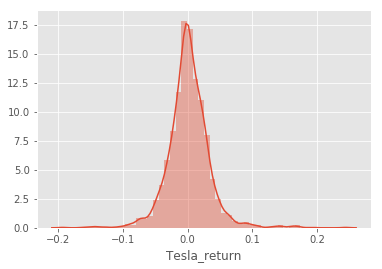

In [25]:
import seaborn as sns
sns.distplot(df_1["Tesla_return"])

C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


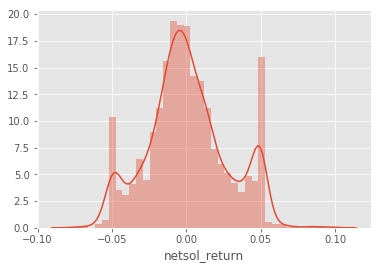

In [26]:
sns.distplot(df_2["netsol_return"])


In [27]:
df_3.corr()

,SANDP500_return,Tesla_return,netsol_return,KSE100_return
SANDP500_return,1.000000,0.356786,0.045442,0.001603
Tesla_return,0.356786,1.000000,0.020884,0.030788
netsol_return,0.045442,0.020884,1.000000,0.410429
KSE100_return,0.001603,0.030788,0.410429,1.000000


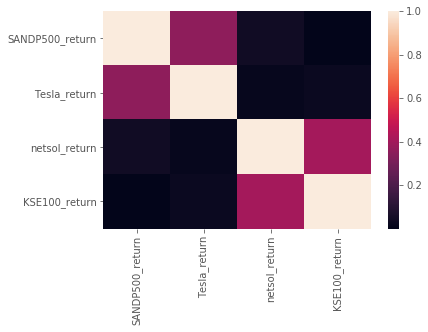

In [28]:
sns.heatmap(df_3.corr())